# DSN PreBootcamp 2021: Vehicle renewal best offer to customers

## Overview

Vehicle insurance (also known as car insurance, motor insurance, or auto insurance) is insurance for cars, trucks, motorcycles, and other road vehicles. Its primary use is to provide financial protection against physical damage or bodily injury resulting from traffic collisions and against liability that could also arise from incidents in a vehicle

FUNUSUNU Insurance company is one of the leading insurance company in Nigeria. The company is known well for giving her customers the best offer on their automobile at the point of renewal and registration.

The company has expanded greatly all over Nigeria over the year but with the transformations and revolution in the automobile industry in terms of the production of smart and self-driving cars, the company's best offer giving is depreciating at an alarming rate has Okonkwo insurance best offer policy is conflicting with the new generation of automobile

The objective of this competition is to build the best machine learning model that can predict the best offer for car insurance for the company to sustain her reign

## Evaluation

<img src='inbox_2025961_f6d8919c909d354ec74891df718dec24_Screenshot_1.png' width="900" height="300">

## Loading Required packages and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [3]:
train = pd.read_csv("~/Downloads/Compressed/train.csv")
test = pd.read_csv("~/Downloads/Compressed/test.csv")

In [4]:
train.head()

,Customer_ID,Sex,Earnings,Region_Code,Marital Status,State_of_Origin,Customer_Worth,Customer_Reply,Plan,Certification,...,Vehicle Class,Vehicle Size,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,kind_of_policy,Active_Policy,Sales Channel,Best_Offer
0,Customer_434,Female,97134,Suburban,Single,Kano,5017.009472,Interested,Silver,First_Degree,...,SUV,Medsize,12,15,0,1,Corporate,C_L2,Agent,1
1,Customer_4641,Female,53754,Suburban,Married,Abuja,5151.301306,Not_interested,Silver,First_Degree,...,SUV,Small,5,2,0,1,Personal,P_L2,Agent,3
2,Customer_4952,Female,25804,Suburban,Divorced,Lagos,4906.894731,Interested,Silver,HND,...,Sports Car,Medsize,3,51,0,1,Personal,P_L3,Agent,0
3,Customer_1489,Female,0,Suburban,Single,Imo,8512.525936,Not_interested,Silver,HND,...,Sports Car,Medsize,5,94,0,8,Personal,P_L2,Branch,1
4,Customer_812,Male,140494,Rural,Single,Imo,3280.531880,Not_interested,Silver,PHD,...,Four-Door Car,Medsize,13,19,2,1,Personal,P_L2,Call Center,3


## Data Preprocessing

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6393 entries, 0 to 6392
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_ID                    6393 non-null   object 
 1   Sex                            6393 non-null   object 
 2   Earnings                       6393 non-null   int64  
 3   Region_Code                    6393 non-null   object 
 4   Marital Status                 6393 non-null   object 
 5   State_of_Origin                6393 non-null   object 
 6   Customer_Worth                 6393 non-null   float64
 7   Customer_Reply                 6393 non-null   object 
 8   Plan                           6393 non-null   object 
 9   Certification                  6393 non-null   object 
 10  Effective To Date              6393 non-null   object 
 11  Status_of_Employment           6393 non-null   object 
 12  Premium_Auto_per_Month         6393 non-null   i

In [24]:
train.describe(include='all')

,Customer_ID,Sex,Earnings,Region_Code,Marital Status,State_of_Origin,Customer_Worth,Customer_Reply,Plan,Certification,...,Vehicle Class,Vehicle Size,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,kind_of_policy,Active_Policy,Sales Channel,Best_Offer
count,6393,6393,6393.000000,6393,6393,6393,6393.000000,6393,6393,6393,...,6393,6393,6393.000000,6393.000000,6393.000000,6393.000000,6393,6393,6393,6393.000000
unique,6393,2,NaN,3,3,5,NaN,2,3,5,...,6,3,NaN,NaN,NaN,NaN,3,9,4,NaN
top,Customer_1229,Female,NaN,Suburban,Married,Lagos,NaN,Not_interested,Bronze,First_Degree,...,Four-Door Car,Medsize,NaN,NaN,NaN,NaN,Personal,P_L3,Agent,NaN
freq,1,3259,NaN,4046,3735,2225,NaN,5494,3895,1896,...,3221,4501,NaN,NaN,NaN,NaN,4774,2409,2437,NaN
mean,NaN,NaN,75460.097294,NaN,NaN,NaN,7977.945276,NaN,NaN,NaN,...,NaN,NaN,15.100266,47.987956,0.768340,2.986235,NaN,NaN,NaN,0.968247
std,NaN,NaN,60449.019210,NaN,NaN,NaN,6718.376651,NaN,NaN,NaN,...,NaN,NaN,10.112762,27.853750,1.845483,2.399311,NaN,NaN,NaN,1.010780
min,NaN,NaN,0.000000,NaN,NaN,NaN,1900.007675,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,20674.000000,NaN,NaN,NaN,4070.092649,NaN,NaN,NaN,...,NaN,NaN,6.000000,24.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000
50%,NaN,NaN,67934.000000,NaN,NaN,NaN,5813.996703,NaN,NaN,NaN,...,NaN,NaN,14.000000,48.000000,0.000000,2.000000,NaN,NaN,NaN,1.000000
75%,NaN,NaN,124652.000000,NaN,NaN,NaN,8988.610653,NaN,NaN,NaN,...,NaN,NaN,23.000000,71.000000,0.000000,4.000000,NaN,NaN,NaN,2.000000


In [25]:
train['Effective To Date'].unique()

array(['3/2/2011', '1/22/11', '2/14/11', '8/1/2011', '2/19/11', '2/17/11',
       '1/1/2011', '1/23/11', '5/2/2011', '2/2/2011', '2/13/11',
       '2/27/11', '2/20/11', '1/29/11', '12/2/2011', '2/25/11',
       '6/1/2011', '1/30/11', '1/13/11', '1/24/11', '2/26/11', '1/16/11',
       '2/18/11', '1/27/11', '10/1/2011', '12/1/2011', '2/16/11',
       '1/31/11', '1/19/11', '3/1/2011', '2/28/11', '7/2/2011', '2/24/11',
       '1/25/11', '4/2/2011', '1/14/11', '11/1/2011', '1/2/2011',
       '1/18/11', '5/1/2011', '7/1/2011', '2/23/11', '1/20/11',
       '11/2/2011', '1/17/11', '2/22/11', '8/2/2011', '9/1/2011',
       '1/21/11', '2/21/11', '9/2/2011', '2/1/2011', '1/28/11',
       '4/1/2011', '6/2/2011', '1/26/11', '2/15/11', '10/2/2011',
       '1/15/11'], dtype=object)

In [57]:
train['Effective To Date'] = pd.to_datetime(train['Effective To Date'])
train['Effective To Date'].dtypes

dtype('<M8[ns]')

In [74]:
test['Effective To Date'] = pd.to_datetime(test['Effective To Date'])
test['Effective To Date'].dtypes

dtype('<M8[ns]')

In [66]:
train['Best_Offer'] = pd.Categorical(train.Best_Offer)

In [99]:
test2 = test.copy()
train2 = train.copy()

In [100]:
train2.drop(["Customer_ID","Effective To Date"],axis=1,inplace=True)
test2.drop(["Customer_ID", "Effective To Date"],axis=1,inplace=True)

In [101]:
cat_cols = ['Sex' , 'Region_Code', 'Marital Status', 'State_of_Origin','Customer_Reply','Plan', 'Certification', 'Status_of_Employment', 'Vehicle Class', 'Vehicle Size', 'kind_of_policy', 'Active_Policy', 'Sales Channel']

In [102]:
train2 = pd.get_dummies(train2,columns=cat_cols)
test2 = pd.get_dummies(test2,columns=cat_cols)

In [103]:
train.isnull().sum()

Customer_ID                      0
Sex                              0
Earnings                         0
Region_Code                      0
Marital Status                   0
State_of_Origin                  0
Customer_Worth                   0
Customer_Reply                   0
Plan                             0
Certification                    0
Effective To Date                0
Status_of_Employment             0
Premium_Auto_per_Month           0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Months Since Last Claim          0
Months Since Policy Inception    0
Counts_of_Open_Complaints        0
No_Of_POlicy                     0
kind_of_policy                   0
Active_Policy                    0
Sales Channel                    0
Best_Offer                       0
dtype: int64

<AxesSubplot:>

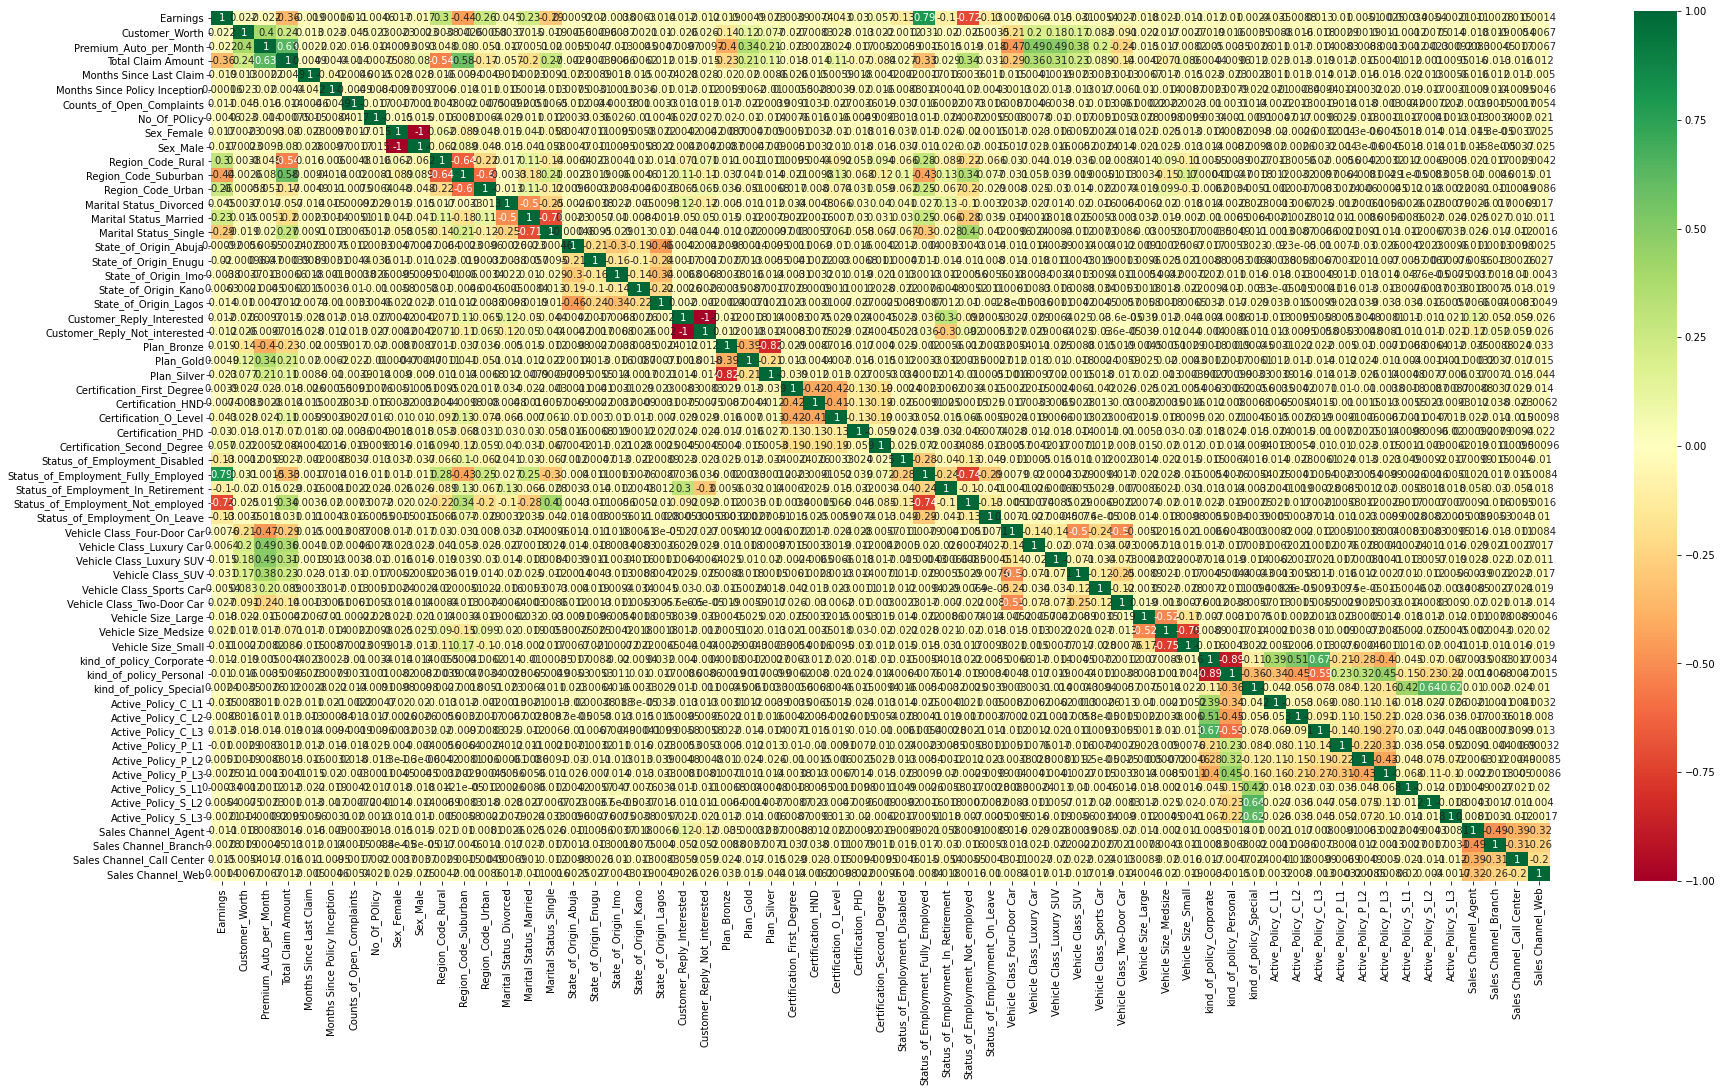

In [104]:
corr_mat = train2.corr()
plt.figure(figsize=(30,16))
sns.heatmap(corr_mat, annot=True, cmap="RdYlGn")

## Best Offer Prediction

In this section, I try out different model classifiers and pick the classifier with the highest accuracy.

In [105]:
y = train2['Best_Offer']
X = train2.drop('Best_Offer',axis = 1)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [114]:
log_model = LogisticRegression()
rf_model = RandomForestClassifier(n_estimators=10000, random_state=1, n_jobs=-1)
d_tree = DecisionTreeClassifier()
kn_mod = KNeighborsClassifier(n_jobs=-1)
from sklearn.metrics import confusion_matrix 

### Logistic Regression Classifier

In [110]:
log_fit = log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_as = accuracy_score(y_test, log_pred)
print("Accuracy is = ",log_as)


Accuracy is =  0.46454640250260687


### Decision Tree Classifier

In [111]:
d_fit = d_tree.fit(X_train, y_train)
d_pred = d_tree.predict(X_test)
d_tas=accuracy_score(y_test,d_pred)

print("Accuracy is = ", d_tas)

Accuracy is =  0.4353493222106361


### K-Nearest Neigbours Classifier

In [112]:
kn_fit = kn_mod.fit(X_train, y_train)
kn_pred = kn_mod.predict(X_test)
kn_as = accuracy_score(y_test, kn_pred)
print("Accuracy is ", kn_as)

Accuracy is  0.4697601668404588


### Random Forest Classifier

In [113]:
rf_fit = rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_as = accuracy_score(y_test, rf_pred)
print("Accuracy is = ",rf_as)


Accuracy is =  0.5495307612095933


In [115]:
confusion_matrix(y_test, rf_pred)

array([[703, 107,   9,   2],
       [245, 345,   5,   4],
       [179,  77,   4,   2],
       [112, 120,   2,   2]], dtype=int64)

### Final Prediction

In [117]:
prediction1 = rf_fit.predict(test2)

In [120]:
prediction=pd.Series(prediction1)
sub1 = pd.DataFrame({'Customer_ID':test['Customer_ID'],'Best_Offer':prediction})
sub1.to_csv("Submission1.csv",index=False)